# PINN (single) visualizations

In [ ]:
from setproctitle import setproctitle
setproctitle("PINN (viz)")

In [ ]:
import os 

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

In [ ]:
total_iterations = 10000
log_interval = 1000

In [ ]:
import numpy as np 

In [ ]:
iterations = np.arange(0, total_iterations+1, log_interval)

In [ ]:
from cmspinn.pinn_nf2_viz import pinn_cube

In [ ]:
# output_path = '/userhome/jeon_mg/workspace/_data/NOAA12673/PINN/20170904_000000'
# vmin = -3000
# vmax = 3000

# i_siz = 160
# j_siz = 100

# i_res = 15
# j_res = 15

In [ ]:
output_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/PINN'
vmin = -200
vmax = 200

i_siz = 32
j_siz = 32

i_res = 10
j_res = 10


In [ ]:
B_path = os.path.join(output_path, 'vtk')
os.makedirs(B_path, exist_ok=True)

## Save

In [ ]:
for epo in iterations:
    save_path = os.path.join(output_path, 'model_%06d.pt' % epo)
    vtk_path = os.path.join(B_path, f'B_pinn_{epo}.vtk')

    pinn = pinn_cube(save_path)
    pinn.calculate_magnetic_fields(batch_size=10000)
    pinn.grid.save(vtk_path)
    
    print(epo)

100%|██████████| 27/27 [00:01<00:00, 26.31it/s]


0


100%|██████████| 27/27 [00:00<00:00, 494.78it/s]


1000


100%|██████████| 27/27 [00:00<00:00, 496.96it/s]


2000


100%|██████████| 27/27 [00:00<00:00, 493.68it/s]


3000


100%|██████████| 27/27 [00:00<00:00, 503.37it/s]


4000


100%|██████████| 27/27 [00:00<00:00, 499.57it/s]


5000


100%|██████████| 27/27 [00:00<00:00, 500.18it/s]


6000


100%|██████████| 27/27 [00:00<00:00, 499.16it/s]


7000


100%|██████████| 27/27 [00:00<00:00, 460.02it/s]


8000


100%|██████████| 27/27 [00:00<00:00, 460.16it/s]


9000


100%|██████████| 27/27 [00:00<00:00, 411.56it/s]


10000


## Plot

In [ ]:
import pyvista as pv
from cmspinn.mag_viz import mag_plotter

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

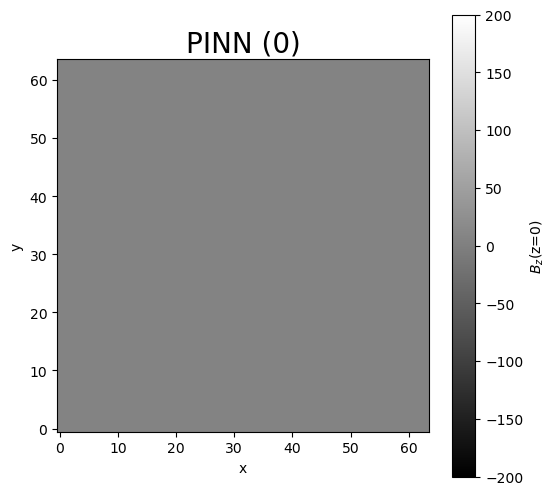

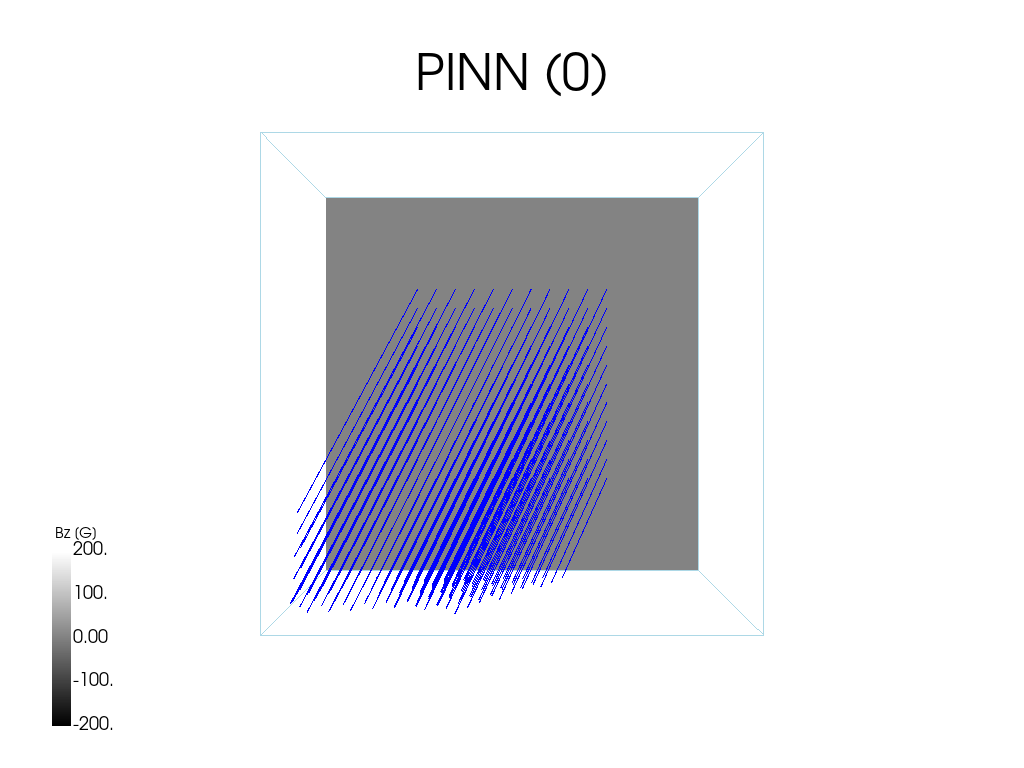

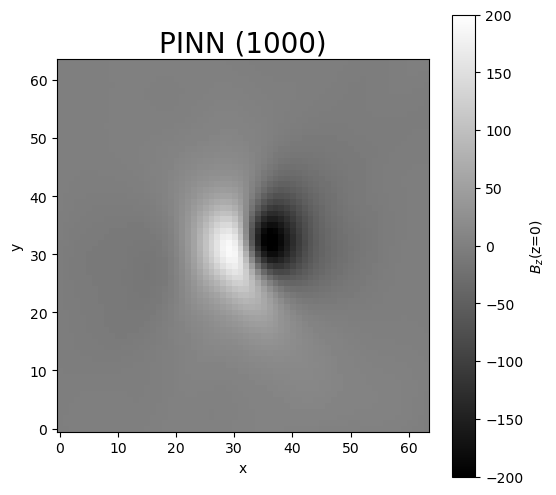

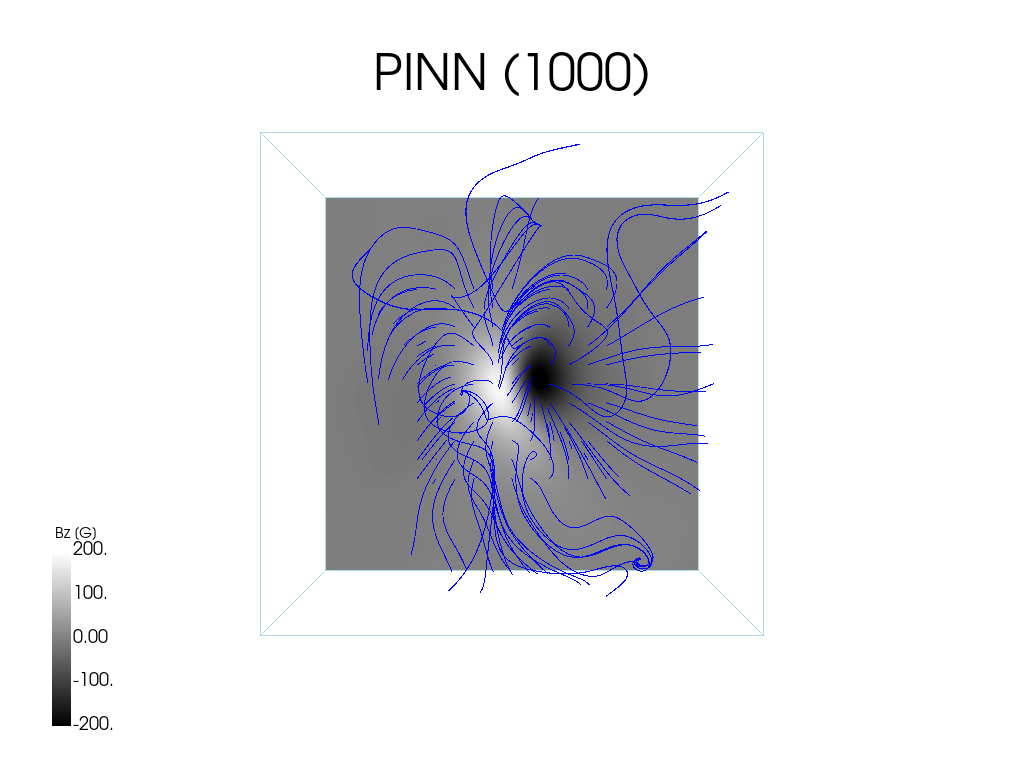

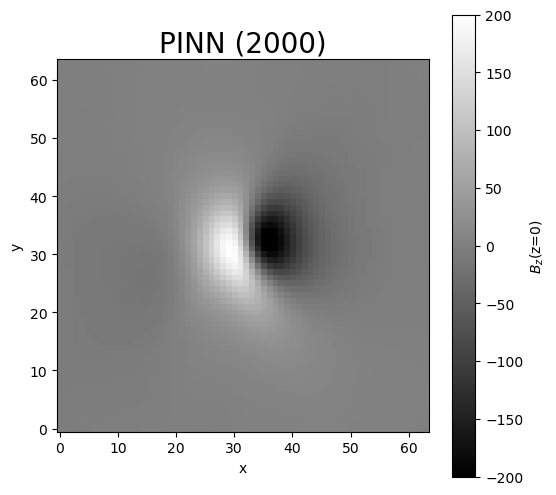

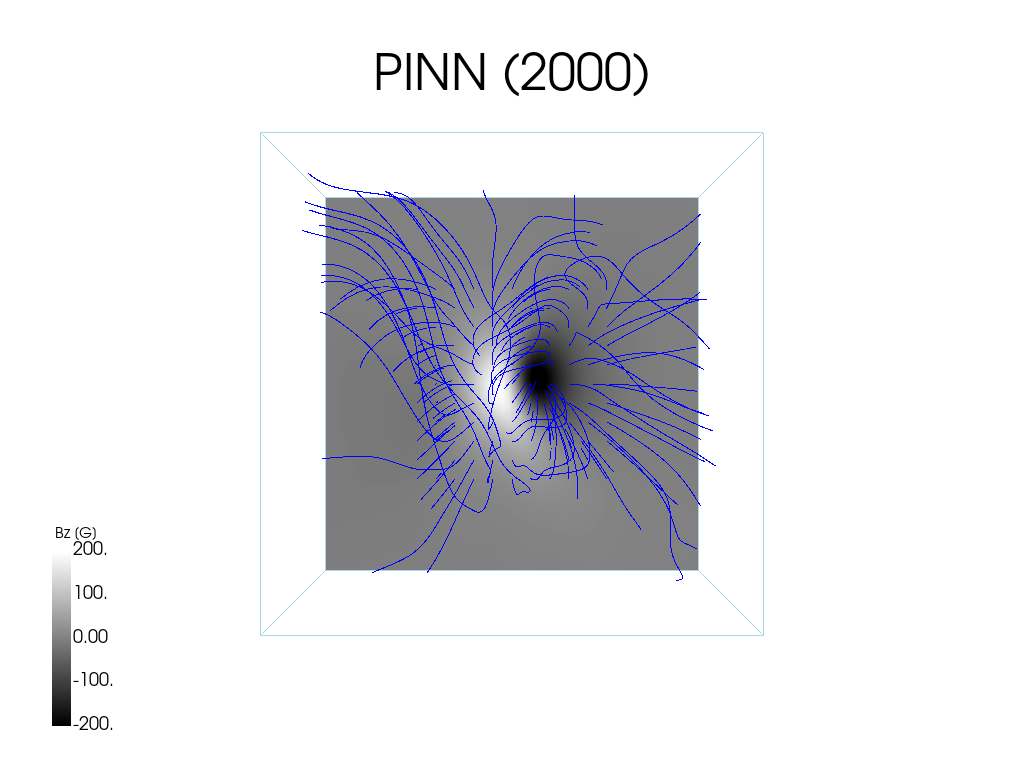

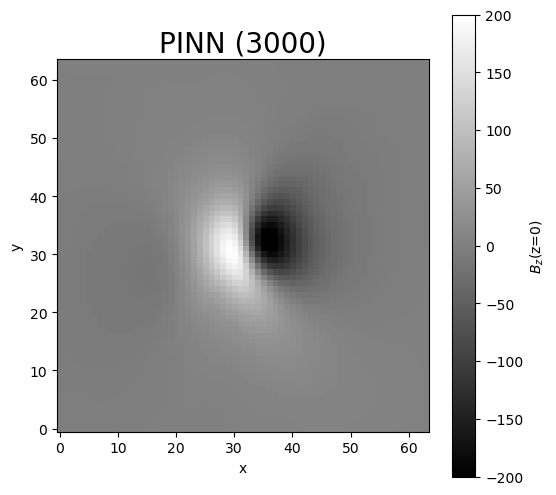

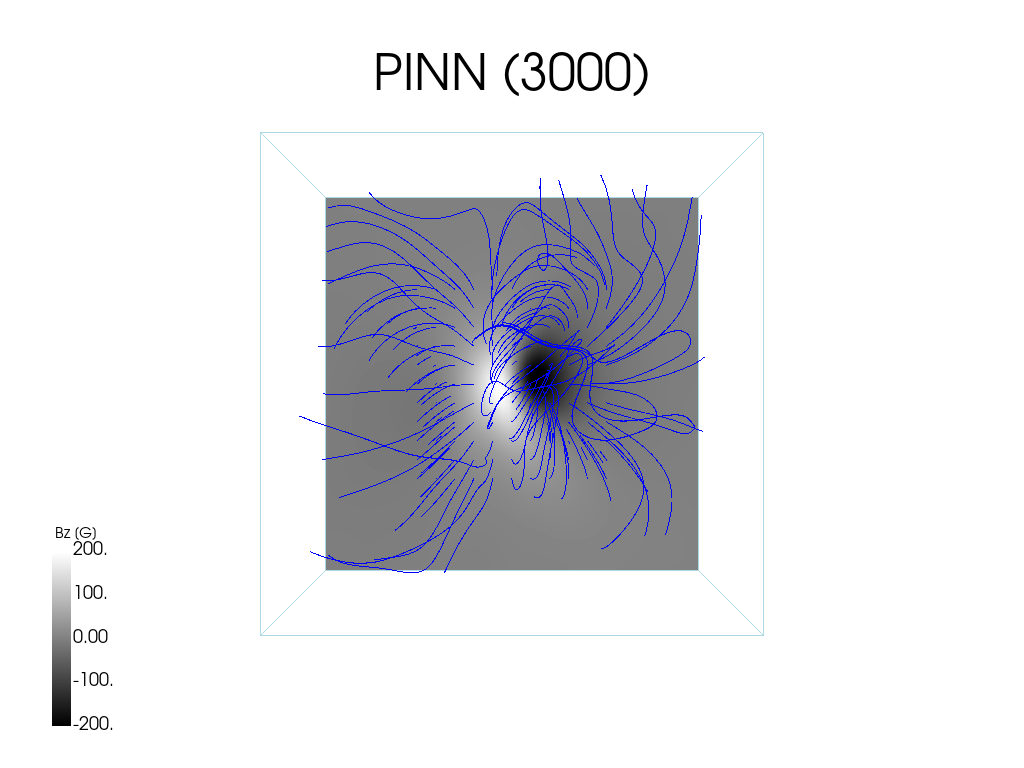

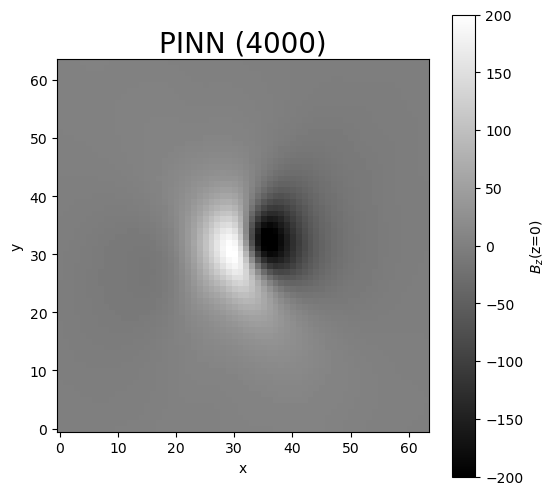

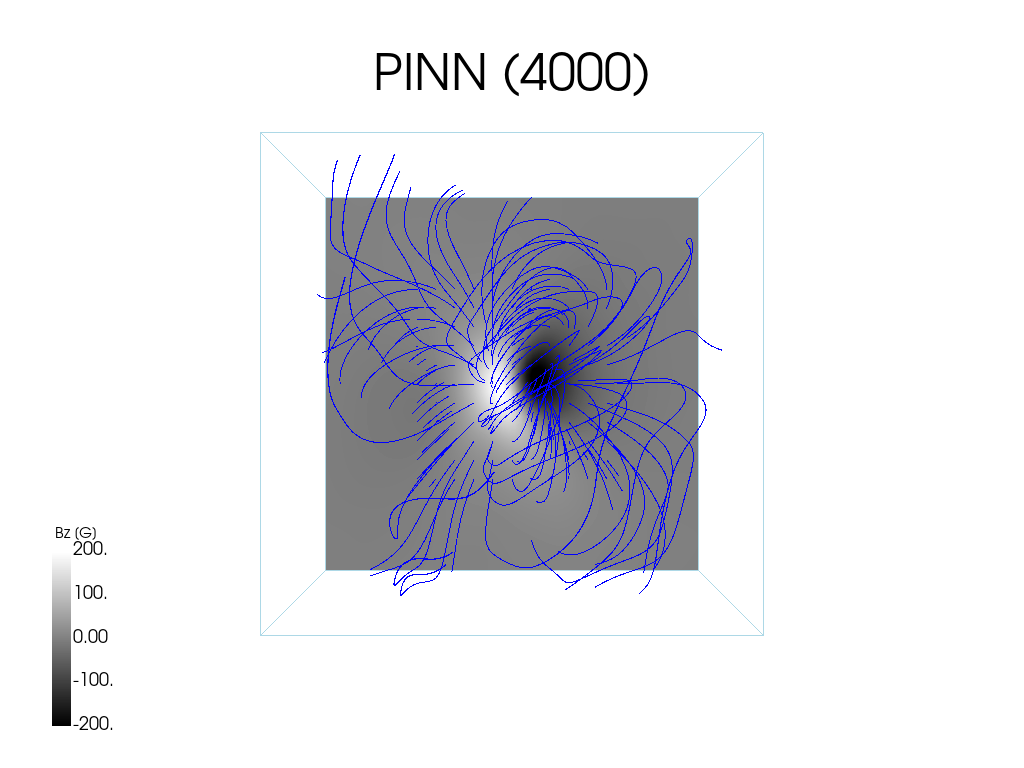

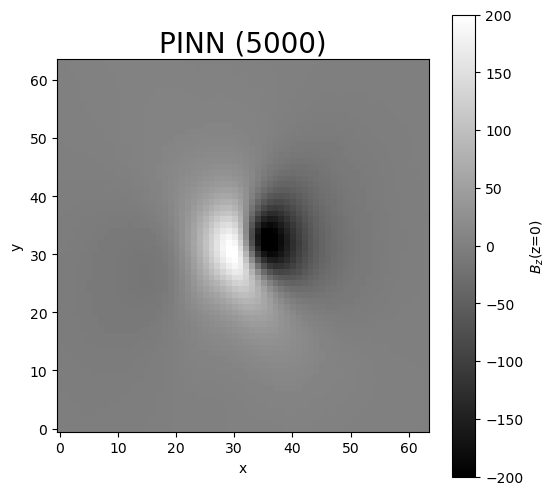

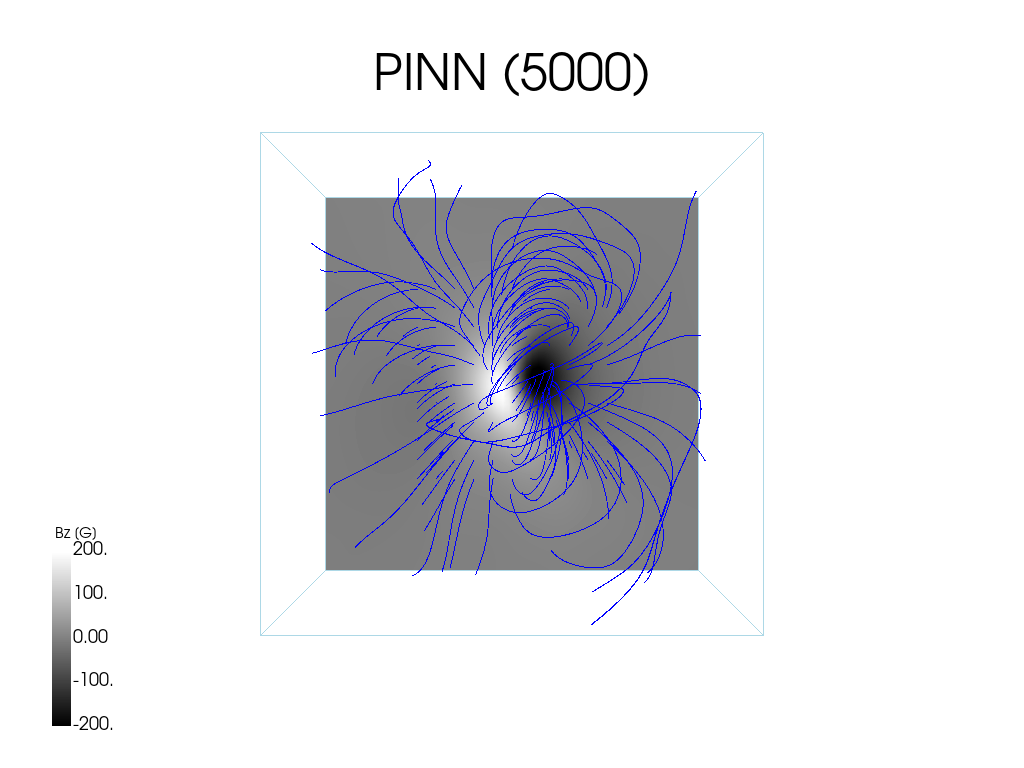

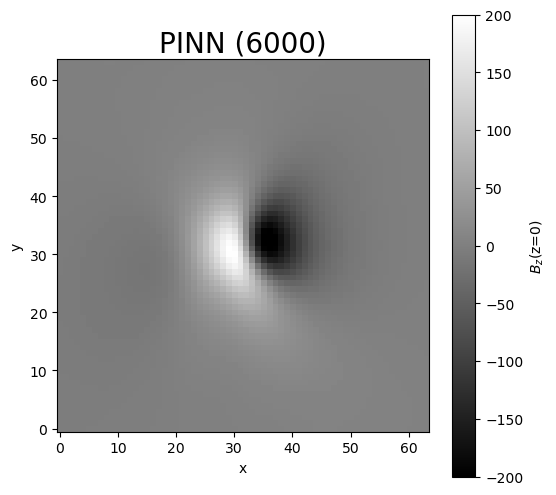

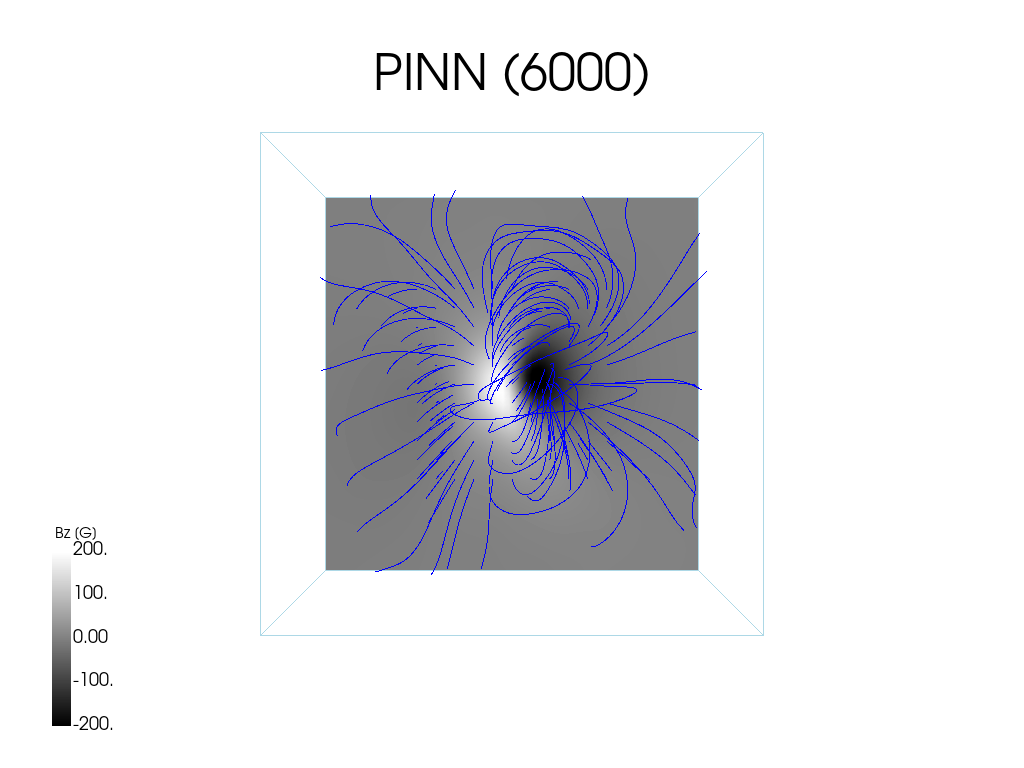

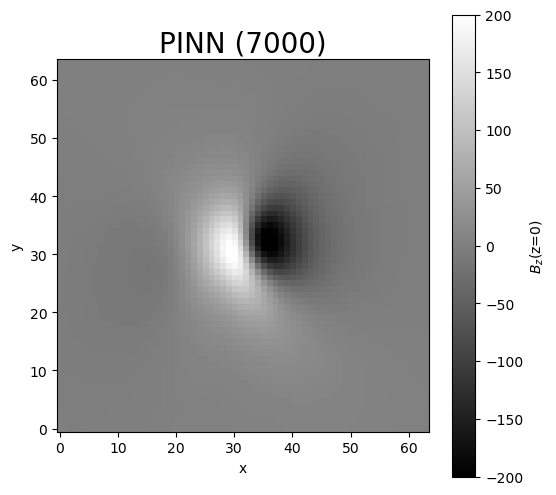

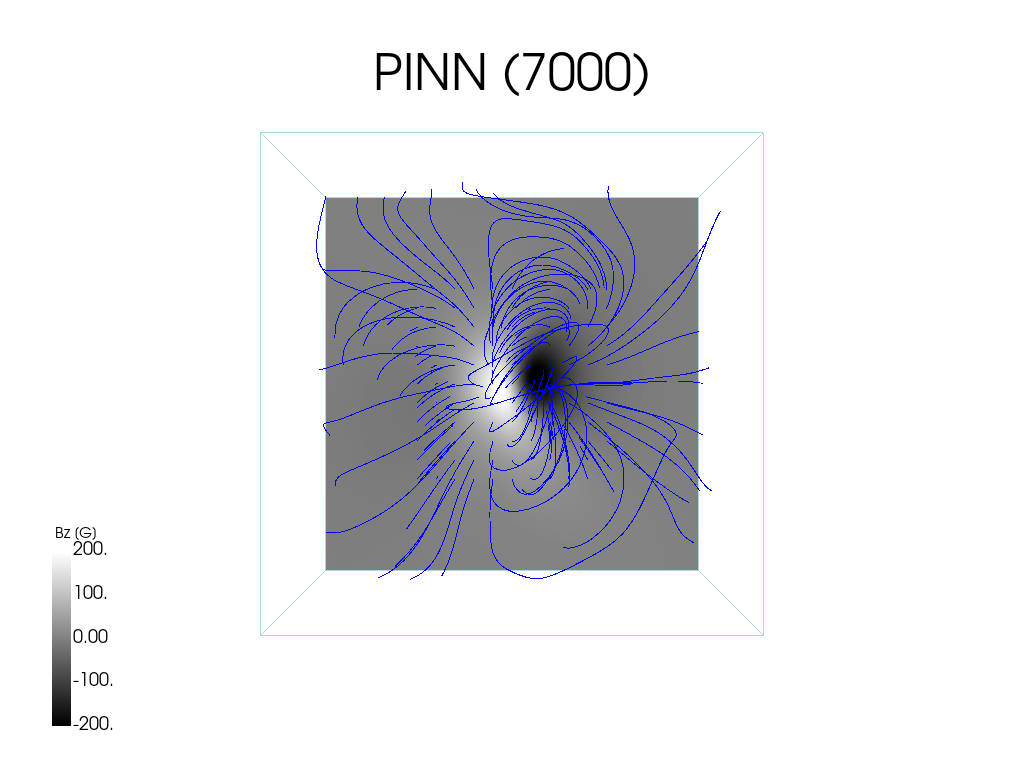

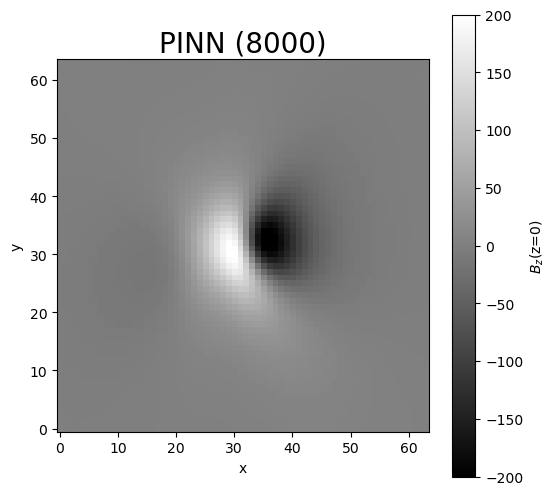

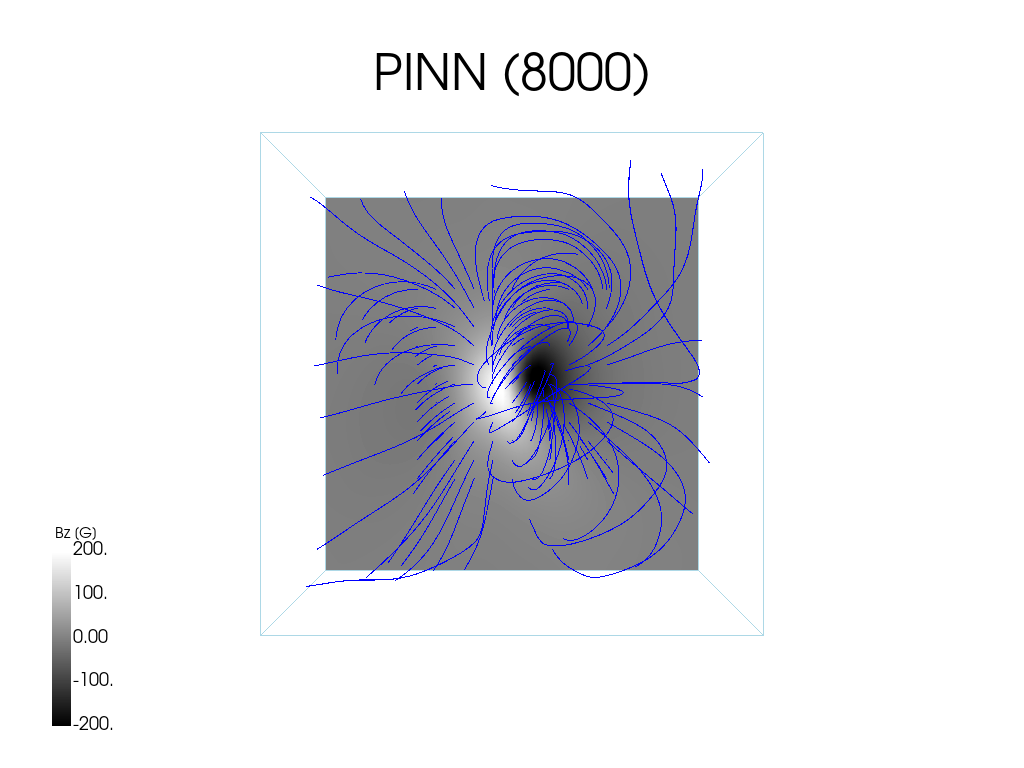

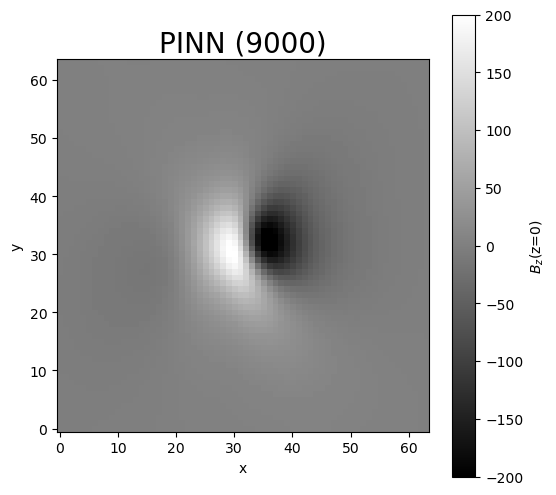

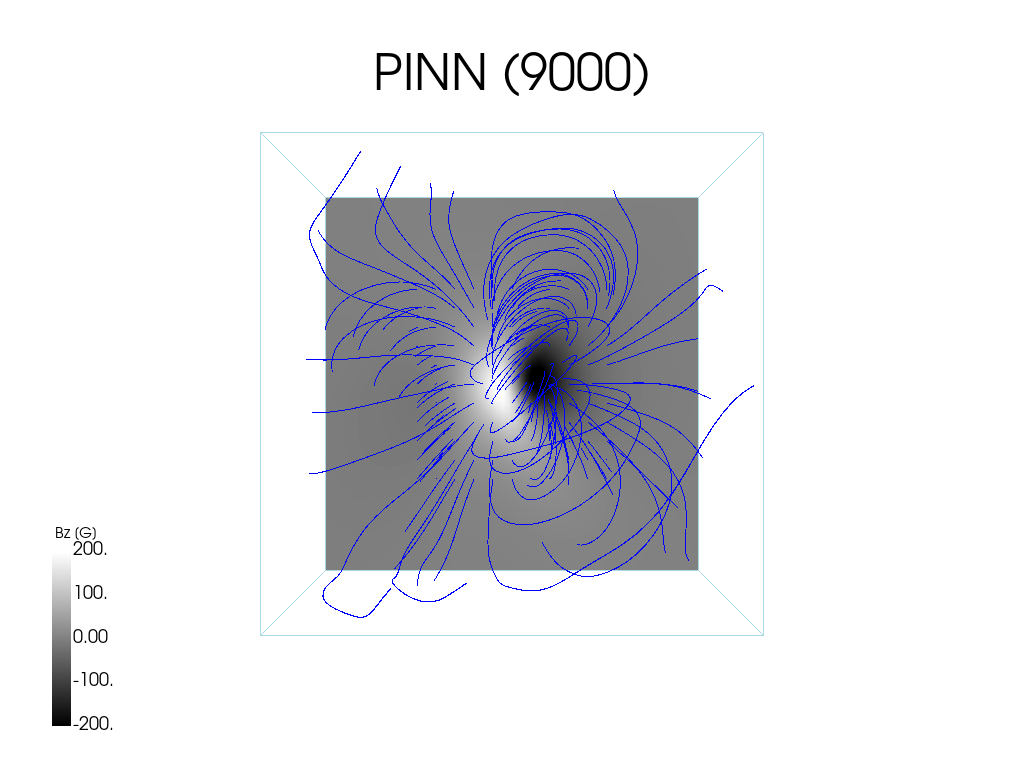

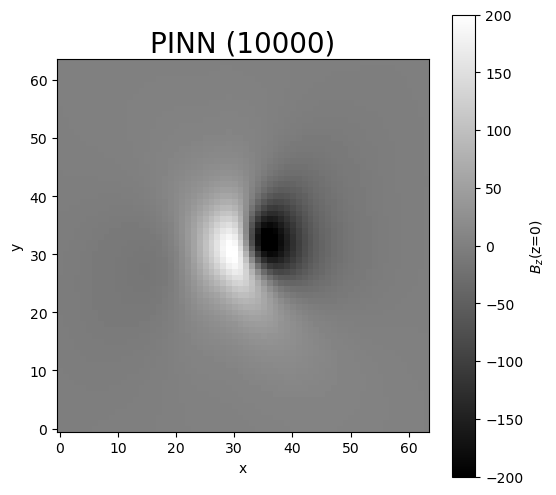

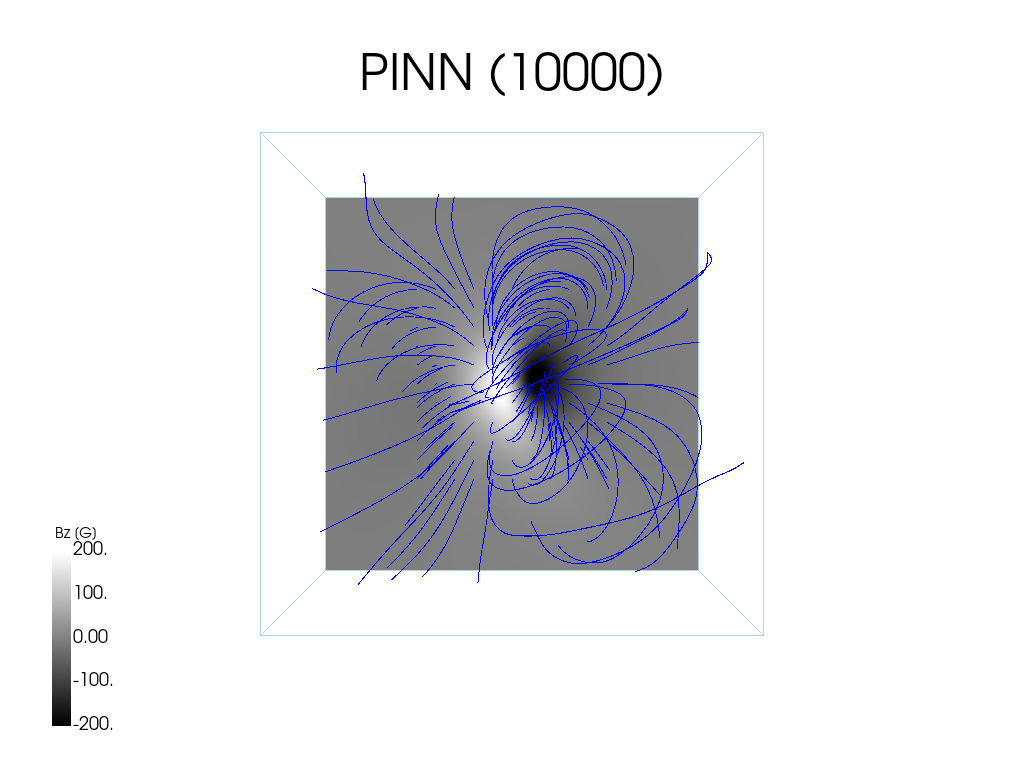

In [ ]:
for epo in iterations:
    B_pinn_vtk_path = os.path.join(B_path, f'B_pinn_{epo}.vtk')
    B_pinn_mesh = pv.read(B_pinn_vtk_path)
    B_pinn = mag_plotter(B_pinn_mesh)

    B_pinn.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax, title=f"PINN ({epo})")

    B_pinn.pv_streamline_Bz(window_size=None, title=f"PINN ({epo})", title_fontsize=20, camera_position='xy', 
                            i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax)